In [44]:
%matplotlib inline
import pandas as pd
import cycluster as cy
import os.path as op
import numpy as np
import palettable
from custom_legends import colorLegend
import seaborn as sns
from hclusterplot import *
import matplotlib
import matplotlib.pyplot as plt
import pprint


In [45]:
sns.set_context('paper')
path = "./"
inf = "NICU_PED_Nurses_JC.csv"
dataFilename = op.join(path,inf)

"""A long df has one analyte measurement per row"""
longDf = pd.read_csv(dataFilename)
print(longDf)

    ID Group     EGF    FGF2  Eotaxin   TGFa    GCSF  Flt3.Ligand  GMCSF  \
0    1  NICU  315.98  202.32   130.74  22.29    7.64        84.46  39.08   
1    2   PED  284.83    2.24   121.98   7.73    1.92         0.79   2.03   
2    3   PED  124.37    2.24   115.57   5.13    1.92         0.47   2.03   
3    4   PED  496.52    3.20   155.48  12.49    2.55         0.47   2.03   
4    5   PED  300.15   30.92   211.56  36.04    1.92        47.09  13.43   
5    6  NICU  506.91   73.37    96.26  13.34    1.92        37.71   2.03   
6    7  NICU  305.05   63.33    49.87   9.33    6.06         0.47   2.03   
7    9  NICU  366.70    2.24    70.72  16.20    1.92         0.47   2.03   
8   10  NICU  351.07   44.67   139.62   9.41    1.92         0.47   9.35   
9   11  NICU  778.56  178.86   210.44  12.45    1.92         0.47  17.10   
10  12   PED  452.37    2.24   140.78   7.19    1.92        16.35   2.03   
11  13   PED  285.58    2.24    86.94   9.63    1.92         0.47  56.86   
12  14   PED

In [70]:
longDf['Groups']=longDf['ID'].astype(str)+'_'+longDf['Group']# longDf = longDf.drop(columns= ['ID', 'Influenza.Status', 'Strain', 'Age', 'Sex', 'CMV.Status', 'EBV.Status', 'HSV1_2.Status', 'HHV6.Status', 'VZV.Status'])
longDf

KeyError: 'ID'

In [71]:
# longDf = longDf.drop(columns= ["IL12p40", "IL10"])
longDf

,EGF,FGF2,Eotaxin,TGFa,GCSF,Flt3.Ligand,GMCSF,Fractalkine,IFNa2,IFNg,...,IL7,IL8,IP10,MCP1,MIP1a,MIP1b,TNFa,TNFb,VEGF,Groups
0,315.98,202.32,130.74,22.29,7.64,84.46,39.08,225.72,189.52,62.70,...,5.10,343.66,114.35,382.44,50.26,100.39,25.90,2.20,251.29,1_NICU
1,284.83,2.24,121.98,7.73,1.92,0.79,2.03,4.11,3.20,7.24,...,5.10,192.11,83.67,464.95,33.46,86.35,20.69,2.20,92.33,2_PED
2,124.37,2.24,115.57,5.13,1.92,0.47,2.03,39.46,2.87,0.89,...,5.10,42.58,69.99,307.84,27.91,42.10,4.05,2.20,51.64,3_PED
3,496.52,3.20,155.48,12.49,2.55,0.47,2.03,4.11,2.87,4.07,...,5.10,153.06,81.81,333.35,35.73,44.64,15.06,2.20,263.02,4_PED
4,300.15,30.92,211.56,36.04,1.92,47.09,13.43,4.11,2.87,25.24,...,5.10,98.75,191.52,378.78,34.88,67.43,14.43,2.20,122.09,5_PED
5,506.91,73.37,96.26,13.34,1.92,37.71,2.03,4.11,2.87,23.50,...,5.10,45.97,84.42,316.96,13.39,50.27,0.92,2.20,173.61,6_NICU
6,305.05,63.33,49.87,9.33,6.06,0.47,2.03,4.11,4.90,8.72,...,5.10,34.56,165.74,629.50,5.20,24.79,16.16,2.20,167.46,7_NICU
7,366.70,2.24,70.72,16.20,1.92,0.47,2.03,4.11,2.87,0.89,...,5.10,194.06,65.67,262.49,31.27,61.33,14.14,2.20,23.78,9_NICU
8,351.07,44.67,139.62,9.41,1.92,0.47,9.35,4.11,2.87,21.91,...,5.10,182.75,47.12,494.96,19.01,42.53,22.43,2.20,307.92,10_NICU
9,778.56,178.86,210.44,12.45,1.92,0.47,17.10,81.55,38.46,58.95,...,10.43,49.99,84.92,610.71,26.13,98.83,39.33,21.97,245.75,11_NICU


In [73]:
Df = longDf.pivot_table(index='Groups')
Df.to_excel('Example_2.xlsx')


In [43]:
# tmp.columns[np.isclose(tmp.std(), 0), rtol, atol].tolist()
print(np.isclose(Df.std(), 0))


SyntaxError: invalid syntax (<ipython-input-43-e84c2da8e203>, line 3)

In [69]:
"""Identify primary day for clustering"""
# df = longDf.set_index(['ptid', 'dpi','cytokine'])['log10_conc'].unstack(['cytokine','dpi'])
# plt.plot([0, 3, 6, 9, 12], df['ifng'].values.T, '-o')

Percent = 20     ## All cytokines with greater(exclusive) percentage of ratio NA : all values will not be considered 

rtol = None      ## Add tolerance values for threshold variance for cytokine values to be considered
atol = None

"""A wide df has one sample per row (analyte measurements across the columns)"""


def _prepCyDf(tmp, K=3, normed=False, cluster="Cluster", percent= 0, rtol= None, atol= None):
#     dayDf = longDf
#     tmp = tmp.pivot_table(index='ptid', columns='cytokine', values='log10_conc')
    if rtol or atol == None:
        noVar = tmp.columns[np.isclose(tmp.std(), 0)].tolist()
    else:
        noVar = tmp.columns[np.isclose(tmp.std(), 0), rtol, atol].tolist()
    naCols = tmp.columns[(tmp.isnull().sum()) / (((tmp.isnull()).sum()) + (tmp.notnull().sum())) > (percent / 100)].tolist() + ["IL12p40", "IL10"]
    keepCols = [c for c in tmp.columns if not c in (noVar + naCols)]
#     dayDf = dayDf.pivot_table(index='ptid', columns='cytokine', values='log10_conc')[keepCols]
    """By setting normed=True the data our normalized based on correlation with mean analyte concentration"""
    tmp = tmp[keepCols]
    rcyc = cy.cyclusterClass(studyStr='ADAMTS', sampleStr=cluster, normed=normed, rCyDf=tmp)
    rcyc.clusterCytokines(K=K, metric='spearman-signed', minN=0)
    rcyc.printModules()
    return rcyc

test = _prepCyDf(Df, K=3, normed=False, cluster="All", percent= 10)





ValueError: Distance matrix 'X' diagonal must be zero.

AttributeError: module 'cycluster' has no attribute 'plotting'

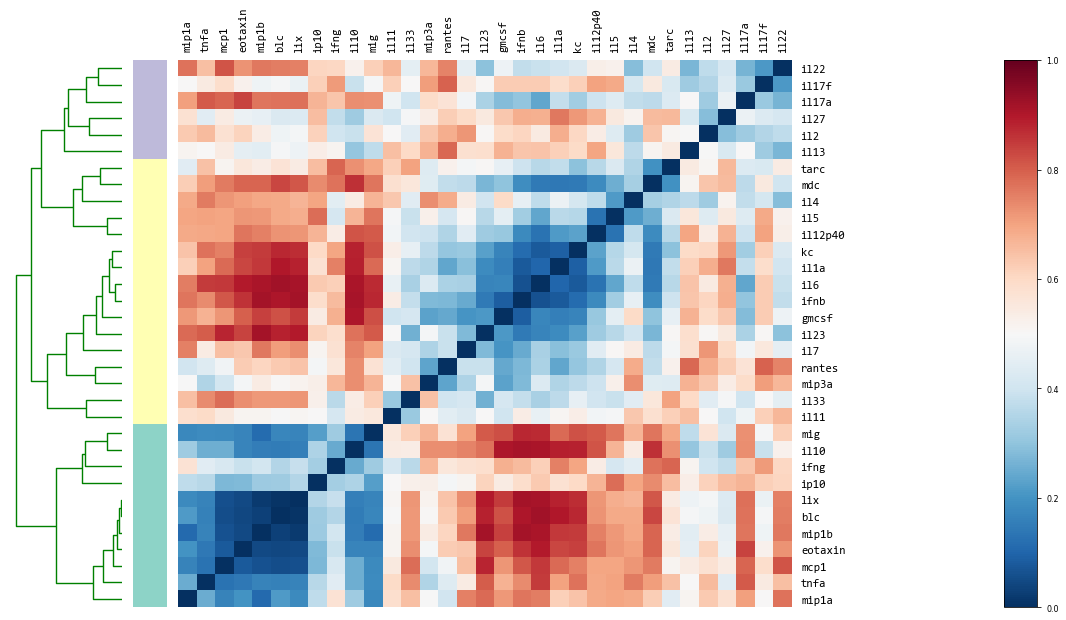

<Figure size 1116x684 with 0 Axes>

In [13]:
"""Now you can use attributes in nserum for plots and testing: cyDf, modDf, dmatDf, etc."""
plt.figure(41, figsize=(15.5, 9.5))
colInds = plotHColCluster(rcyc.cyDf,
                          method='complete',
                          metric='pearson-signed',
                          col_labels=rcyc.labels,
                          col_dmat=rcyc.dmatDf,
                          tickSz='large',
                          vRange=(0,1))

plt.figure(43, figsize = (15.5, 9.5))
colInds = cy.plotting.plotHierClust(1 - rcyc.pwrel,
                               rcyc.Z,
                               labels=rcyc.labels,
                               titleStr='Pairwise reliability (%s)' % rcyc.name,
                               vRange=(0, 1),
                               tickSz='large')

plt.figure(901, figsize=(13, 9.7))
cy.plotting.plotModuleEmbedding(rcyc.dmatDf, rcyc.labels, method='kpca', txtSize='large')
colors = palettable.colorbrewer.get_map('Set1', 'qualitative', len(np.unique(rcyc.labels))).mpl_colors
colorLegend(colors, ['%s%1.0f' % (rcyc.sampleStr, i) for i in np.unique(rcyc.labels)], loc='lower left')


In [15]:
import scipy.stats

"""df here should have one column per module and the genotype column"""
ptidDf = longDf[['ptid', 'sample', 'genotype', 'dpi']].drop_duplicates().set_index('ptid')
df = rcyc.modDf.join(ptidDf)

ind = df.genotype == 'WT'
col = 'LUNG1'
# stats.ranksums(df[col].loc[ind], df[col].loc[~ind])


